In [182]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pickle


TRAIN_NEW_MODEL = False
NEW_MODEL_TRAIN_COUNT = 30

In [183]:
# Read csv and output feature columns.
df = pd.read_csv('fortune_500.csv')
df.columns

Index(['Rank', 'Title', 'Website', 'Employees', 'Sector', 'Industry',
       'Hqlocation', 'Hqaddr', 'Hqcity', 'Hqstate', 'Hqzip', 'Hqtel', 'Ceo',
       'Ceo-title', 'Address', 'Ticker', 'Fullname', 'Revenues', 'Revchange',
       'Profits', 'Prftchange', 'Assets', 'Totshequity'],
      dtype='object')

In [184]:
# Remove all empty rows and get information about the data types in the df.
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         500 non-null    int64  
 1   Title        500 non-null    object 
 2   Website      500 non-null    object 
 3   Employees    500 non-null    int64  
 4   Sector       500 non-null    object 
 5   Industry     500 non-null    object 
 6   Hqlocation   500 non-null    object 
 7   Hqaddr       500 non-null    object 
 8   Hqcity       500 non-null    object 
 9   Hqstate      500 non-null    object 
 10  Hqzip        500 non-null    int64  
 11  Hqtel        500 non-null    object 
 12  Ceo          500 non-null    object 
 13  Ceo-title    500 non-null    object 
 14  Address      500 non-null    object 
 15  Ticker       500 non-null    object 
 16  Fullname     500 non-null    object 
 17  Revenues     500 non-null    int64  
 18  Revchange    500 non-null    float64
 19  Profits 

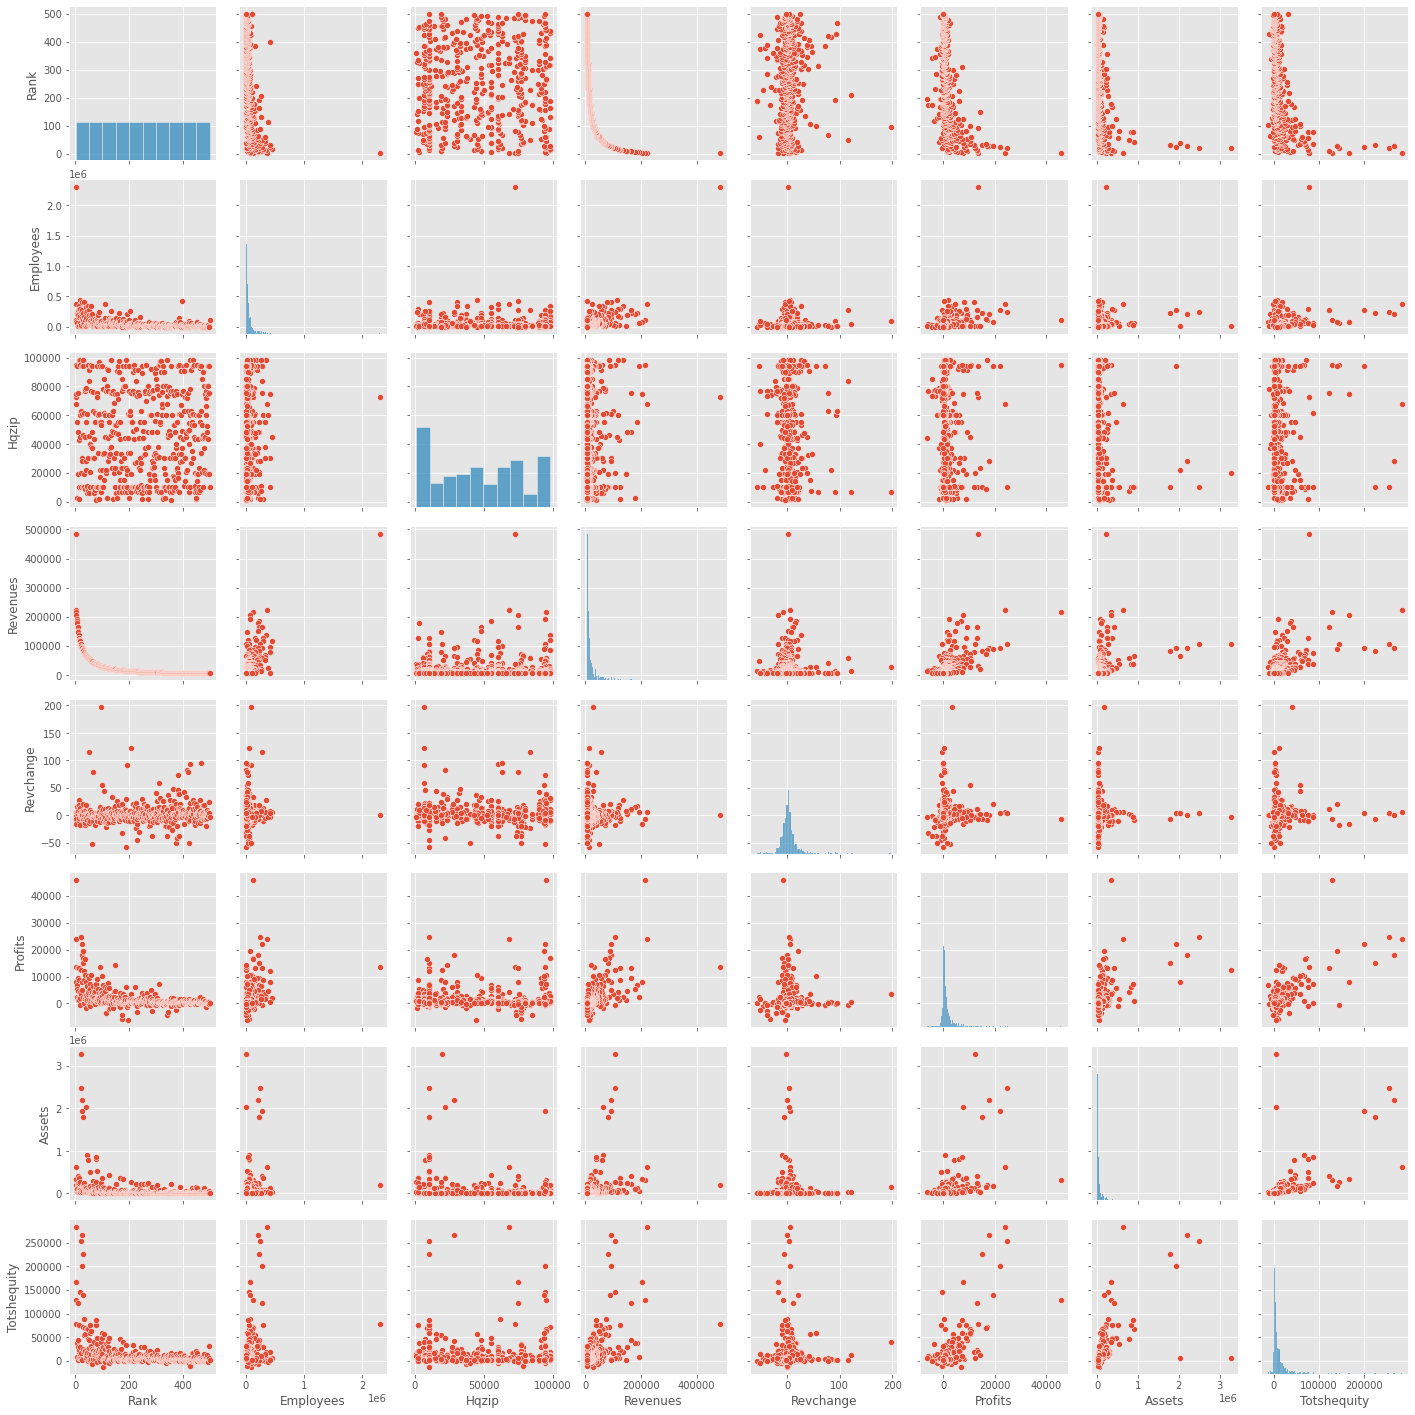

In [185]:
# Understand different relationship between different variables with seaborn.
sns.pairplot(df)

In [215]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

def train_new_model():
    """
    Train new model by attempting to create the best model in a certain
    amount of tries - NEW_MODEL_TRAIN_COUNT.
    Save the best model as a pickle file.
    """
    x = df[['Profits', 'Employees', 'Assets', 'Totshequity']]  # Variables used to make predictions
    y = df['Revenues']  # Variables we are going to predict
    best = 0
    for i in range(NEW_MODEL_TRAIN_COUNT):

        # Split data into training and testing.
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

        # Apply linear regression model.
        LinReg = LinearRegression()
        LinReg.fit(x_train, y_train)

        # Calculate accuracy and swap model if it's better than the current best.
        accuracy = LinReg.score(x_test, y_test)
        if accuracy > best:
            best = accuracy
            with open('fortune_500_model.pickle', 'wb') as f:
                pickle.dump(LinReg, f)

# Train new model if specified, otherwise populate it from the pickle file.
if TRAIN_NEW_MODEL:
    train_new_model()
pickle_in = open('fortune_500_model.pickle', 'rb')
LinReg = pickle.load(pickle_in)

# Evaluate the model's coefficients.
print('Accuracy: ', LinReg.score(x_test, y_test))
print('Coefficients: ', LinReg.coef_)
pd.DataFrame(LinReg.coef_, x.columns, columns = ['Coeff'])

Accuracy:  0.8047249767728644
Coefficients:  [2.80899454 0.1575177  0.00390356 0.34680057]


Coeff
Profits      2.808995
Employees    0.157518
Assets       0.003904
Totshequity  0.346801

In [187]:
# Make predictions, then compare it to y_test to evaluate performance.
predictions = LinReg.predict(x_test)
for count, i in enumerate(y_test):
    print('Prediction: ', predictions[count], ' Actual: ', i)

Prediction:  19565.47605625586  Actual:  15195
Prediction:  11238.657587786252  Actual:  5901
Prediction:  7893.396378775166  Actual:  14287
Prediction:  18101.89848071587  Actual:  10183
Prediction:  19306.237615670714  Actual:  12574
Prediction:  12561.516328017427  Actual:  7163
Prediction:  11600.603133526747  Actual:  8659
Prediction:  22800.59863282308  Actual:  9455
Prediction:  12796.853903688423  Actual:  7922
Prediction:  17575.83227126834  Actual:  8959
Prediction:  13139.625838544383  Actual:  6775
Prediction:  11571.35901190131  Actual:  8613
Prediction:  75846.34766294267  Actual:  80403
Prediction:  18570.320502766033  Actual:  19037
Prediction:  10300.839596133224  Actual:  6477
Prediction:  16959.552954685187  Actual:  11869
Prediction:  14921.179872628945  Actual:  5599
Prediction:  7862.157166197517  Actual:  5387
Prediction:  25838.347744634895  Actual:  20718
Prediction:  12308.381798251012  Actual:  8829
Prediction:  187725.62620025143  Actual:  94176
Prediction: 

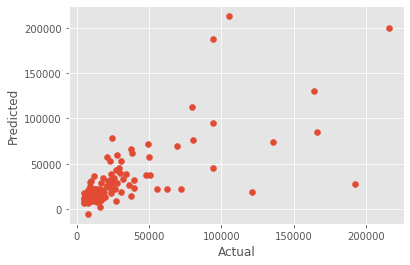

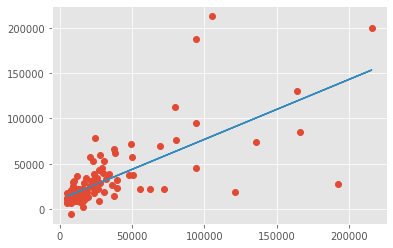

In [188]:
# Produce scatter graph between y_test values and predictions.
style.use('ggplot')
plt.scatter(y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Draw line of best fit.
slope, y_intercept = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, predictions, 'o')
plt.plot(y_test, slope*y_test + y_intercept)

(array([  2.,   1.,   5., 110.,  23.,   5.,   2.,   1.,   0.,   1.]),
 array([-107163.24288369,  -79931.65149696,  -52700.06011023,
         -25468.4687235 ,    1763.12266323,   28994.71404996,
          56226.3054367 ,   83457.89682343,  110689.48821016,
         137921.07959689,  165152.67098362]),
 <BarContainer object of 10 artists>)

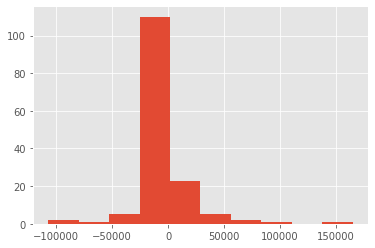

In [189]:
plt.hist(y_test - predictions)

In [190]:
# Predict: Core-Mark Holding
# Actual revenues: 11507
prediction = LinReg.predict([[54.2, 7688, 1497, 530]])
print('Prediction: ', prediction[0])
print('Accuracy: ', prediction[0] / 11507 * 100, '%')


Prediction:  8517.662002784384
Accuracy:  74.0215695036446 %


C:\Dev\Tools\Python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [191]:
# The mean squared error
print("Mean squared error: %.2f" % np.mean((LinReg.predict(x_test) - y_test) ** 2))

Mean squared error: 639118108.70


In [192]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % LinReg.score(x_test, y_test))

Variance score: 0.48
